# Full Model Visualizations Notebook

# Setup

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import read_data, K
from tqdm import tqdm
import seaborn as sns
from utils import read_data
from data_processing import *
from bias_model import *
import seaborn as sns
from hw5_model import *

In [3]:
DATA_PATH = 'data/data.csv'
MOVIES_PATH = 'data/movies.csv'
data = pd.read_csv(DATA_PATH, sep=',')
movies = pd.read_csv(MOVIES_PATH, sep=',')
movies['Year'] = movies['Movie Title'].str[-5:].str[:4].astype('int') 

In [57]:
# Need to pick some 10 movies of our choosing (these are all bangers that I highly recommend :) )
my_favorite_films = ["Shrek (2001)", 
                     "Shrek 2 (2004)", 
                     "Shrek Forever After (a.k.a. Shrek: The Final Chapter) (2010)",
                     "Shrek the Third (2007)",
                     "Puss in Boots (2011)",
                     "South Park: Imaginationland (2008)",
                     "Social Network, The (2010)", 
                     "Star Wars: Episode II - Attack of the Clones (2002)", 
                     "Star Wars: Episode III - Revenge of the Sith (2005)",
                     "Star Trek (2009)"]
my_favorite_film_IDs = []

for film in my_favorite_films:
    my_favorite_film_IDs.append(movies['Movie ID'][movies["Movie Title"] == film].to_numpy()[0])
    

In [61]:
# Need to get the 10 most popular movies
my_popular_films = []
my_popular_film_IDs = get_top_ten_most_popular_movie_ids()

for id in my_popular_film_IDs:
    my_popular_films.append(movies['Movie Title'][movies["Movie ID"] == id].to_numpy()[0])
    

In [81]:
# Need to get the 10 best movies
my_best_films = []
my_best_film_IDs = data.groupby(by='Movie ID').mean().sort_values('Rating', ascending=False)[:10].index.values

for id in my_best_film_IDs:
    my_best_films.append(movies['Movie Title'][movies["Movie ID"] == id].to_numpy()[0])
    

In [108]:
#We need to choose some genres
def getGenre(genre, yes=1):
    return movies.loc[movies[genre]==yes]["Movie ID"].to_numpy(), movies.loc[movies[genre]==yes]["Movie Title"].to_numpy()
genres = ["Children", "Horror", "Sci-Fi"]    


In [58]:
def plotFromList(approx_V,IDs,titles):
    to_viz_np = []
    for i in IDs:
        to_viz_np.append(approx_V[:,i])
    to_viz_np = np.array(to_viz_np)
    to_viz_df = pd.DataFrame(to_viz_np, columns = ['x', 'y'])
    ax = sns.scatterplot(to_viz_df, x='x', y='y')
    for i, (x, y) in to_viz_df.iterrows():
        ax.text(x+.01, y+.01, str(titles[i]))
    return ax

In [85]:
def plotFavoriteFilms(approx_V):
    return plotFromList(approx_V, my_favorite_film_IDs, my_favorite_films)

In [86]:
def plotPopularFilms(approx_V):
    return plotFromList(approx_V, my_popular_film_IDs, my_popular_films)

In [114]:
def plotBestFilms(approx_V):
    return plotFromList(approx_V, my_best_film_IDs, my_best_films)

In [121]:
def plotGenre(approx_V, genre):
    GIDs, GTitles = getGenre(genre)
    GIDs = GIDs[:10]
    GTitles = GTitles[:10]
    plotFromList(approx_V, GIDs, GTitles)

# HW5 Model

In [10]:
U, V = get_U_V(data)
num_users, num_movies = compute_num_users_and_movies(data)
eta = 0.03
reg = 0.1
eps = 0.0001
max_epochs = 300
data_as_numpy = data.to_numpy(copy=True).astype(int)
A, S, B = np.linalg.svd(V)
approx_V = np.dot(A[:, :2].T, V)
approx_U = np.dot(A[:, :2].T, U)

  5%|████▉                                                                                             | 15/300 [00:16<05:11,  1.09s/it]


## 1) 10 Movies of Our Choosing 

<AxesSubplot: xlabel='x', ylabel='y'>

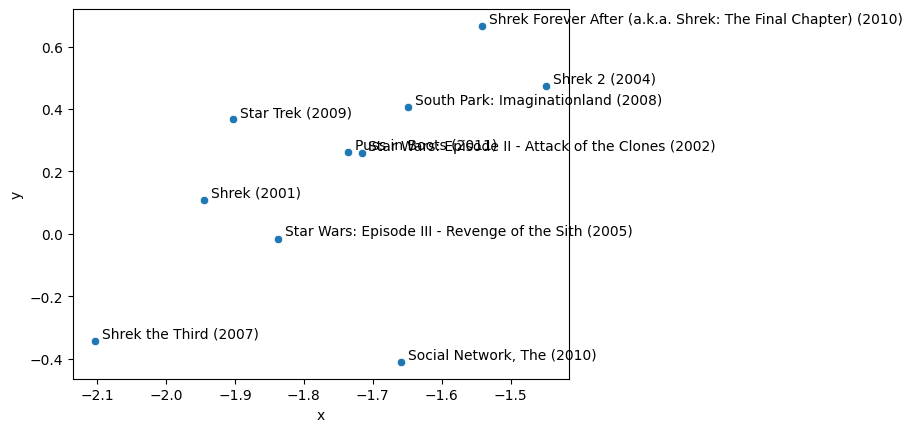

In [60]:
plotFavoriteFilms(approx_V)

## 2) 10 Most Popular Movies

<AxesSubplot: xlabel='x', ylabel='y'>

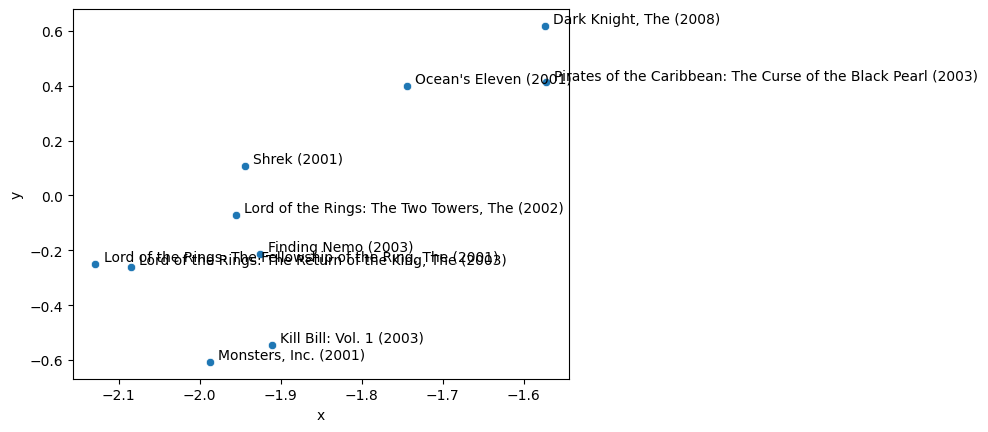

In [88]:
plotPopularFilms(approx_V)

## 3) 10 Best Movies

<AxesSubplot: xlabel='x', ylabel='y'>

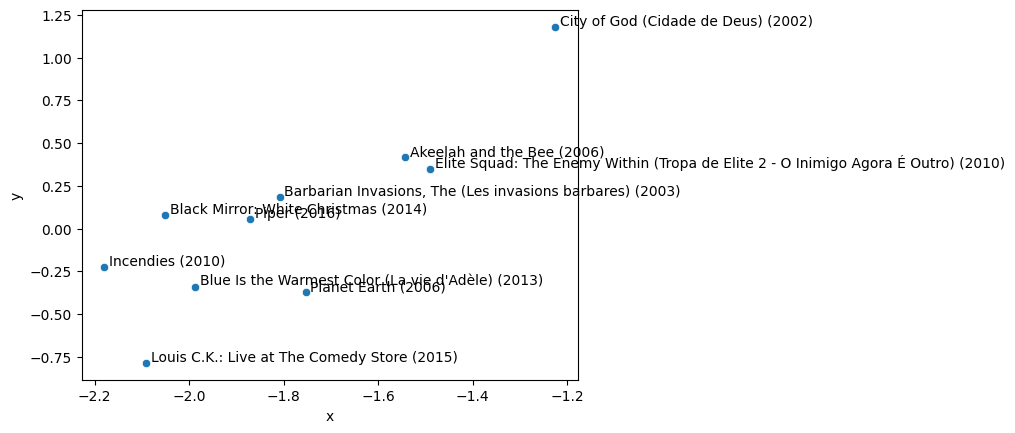

In [89]:
plotBestFilms(approx_V)

## 4) Genres
### a) Childrens

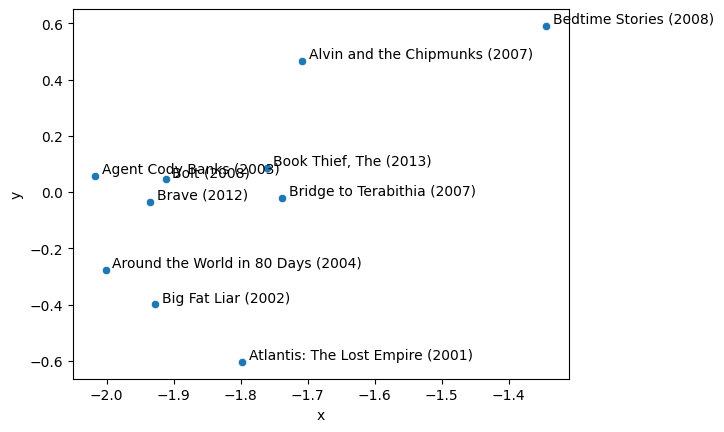

In [122]:
plotGenre(approx_V, genres[0])

### b) Horror

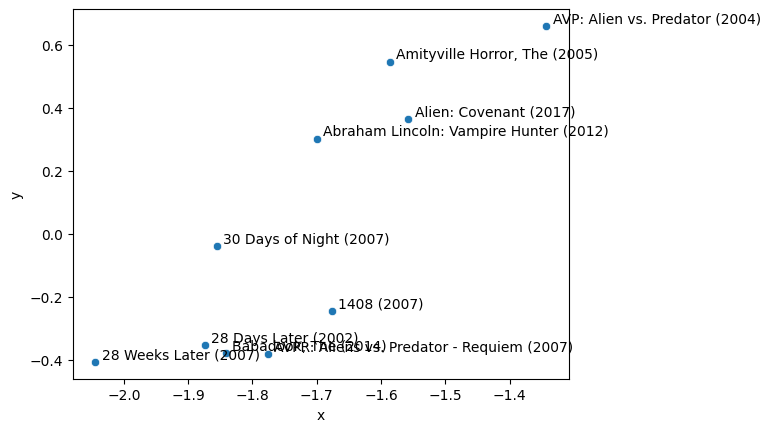

In [123]:
plotGenre(approx_V, genres[1])

### c) Sci-Fi

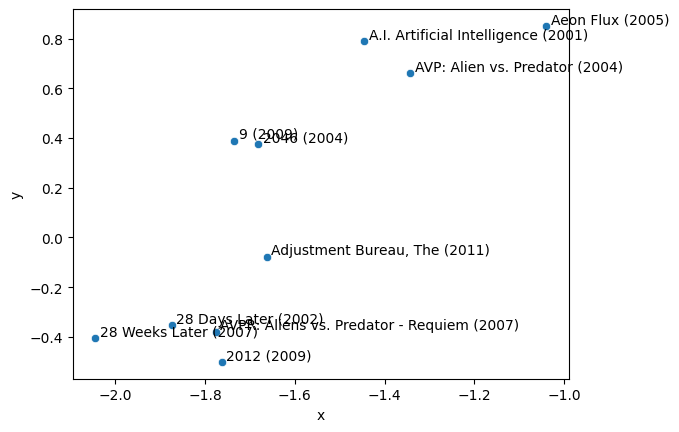

In [124]:
plotGenre(approx_V, genres[2])

# Bias Model

In [126]:
data, movies = read_data()
U, V, a, b = get_U_V_a_b(data)
num_users, num_movies = compute_num_users_and_movies(data)
eta = 0.03
reg = 0.1
eps = 0.0001
max_epochs = 300
data_as_numpy = data.to_numpy(copy=True).astype(int)
A, S, B = np.linalg.svd(V)
approx_V = np.dot(A[:, :2].T, V)
approx_U = np.dot(A[:, :2].T, U)

## 1) 10 Movies of Our Choosing 

<AxesSubplot: xlabel='x', ylabel='y'>

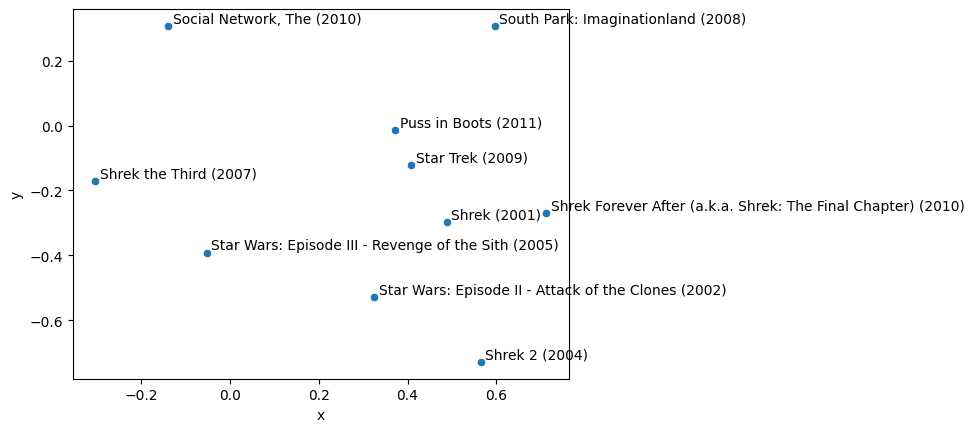

In [127]:
plotFavoriteFilms(approx_V)

## 2) 10 Most Popular Movies

<AxesSubplot: xlabel='x', ylabel='y'>

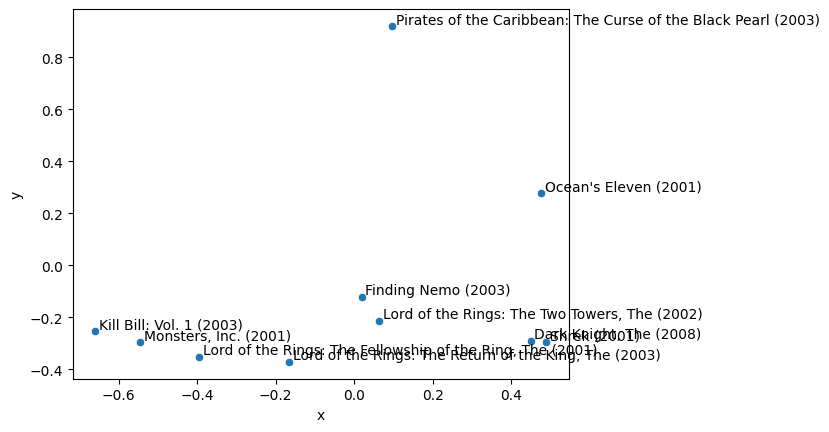

In [128]:
plotPopularFilms(approx_V)

## 3) 10 Best Movies

<AxesSubplot: xlabel='x', ylabel='y'>

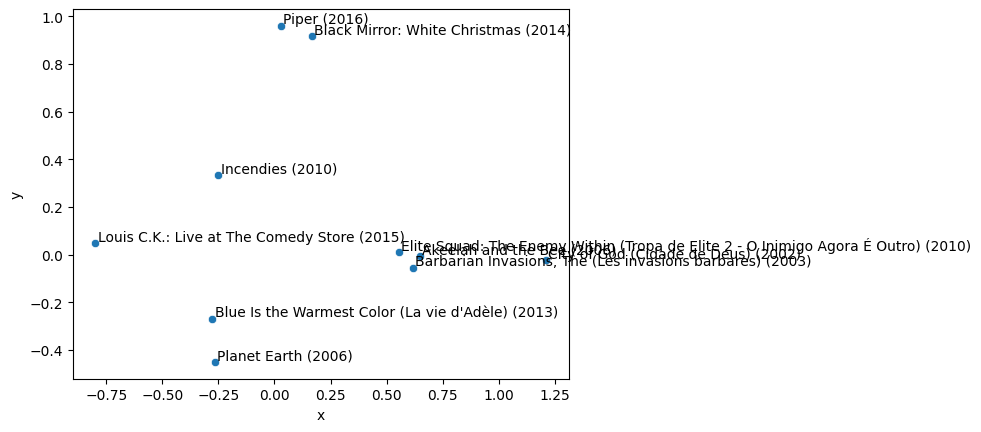

In [129]:
plotBestFilms(approx_V)

## 4) Genres
### a) Childrens

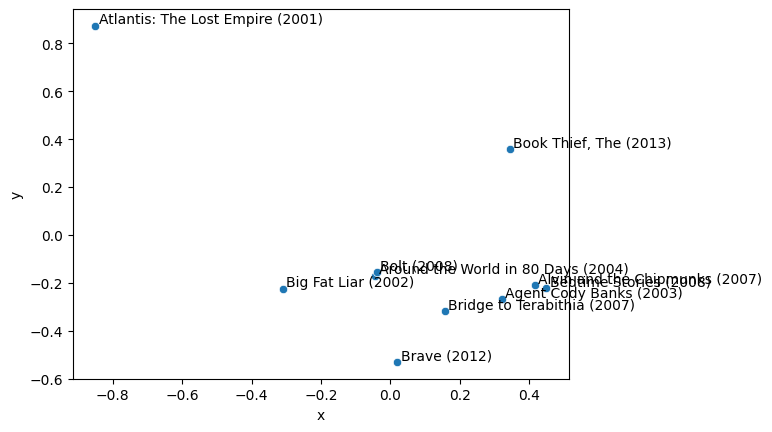

In [130]:
plotGenre(approx_V, genres[0])

### b) Horror

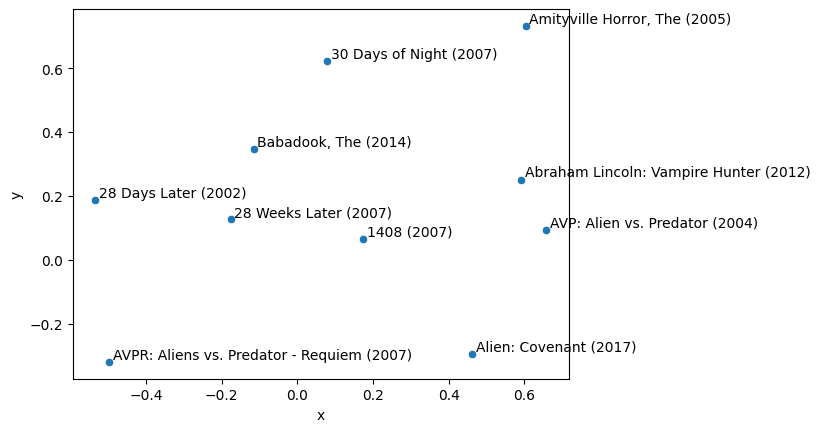

In [131]:
plotGenre(approx_V, genres[1])

### c) Sci-Fi

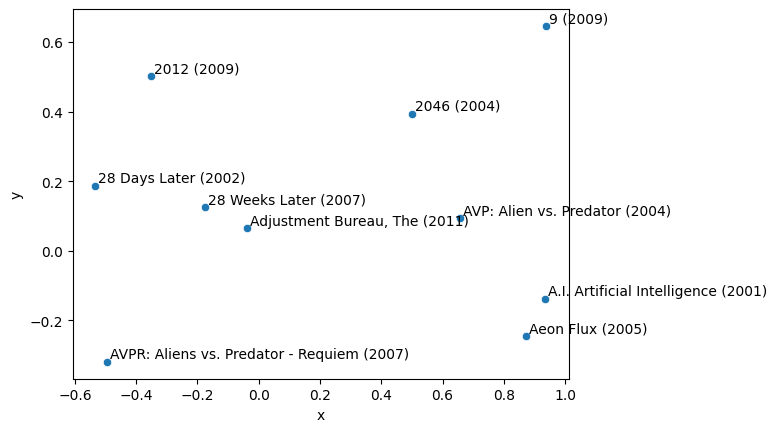

In [132]:
plotGenre(approx_V, genres[2])

# Suprise Model

In [137]:
from surprise_nmf import get_U_V
from surprise import NMF

data, movies = read_data()
model = NMF()
U, V = get_U_V(NMF, data)
A, S, B = np.linalg.svd(V)
approx_V = np.dot(A[:, :2].T, V)
approx_U = np.dot(A[:, :2].T, U)

## 1) 10 Movies of Our Choosing 

<AxesSubplot: xlabel='x', ylabel='y'>

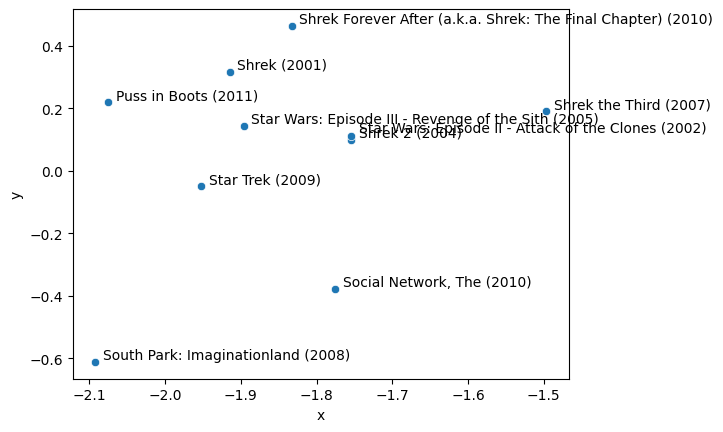

In [138]:
plotFavoriteFilms(approx_V)

## 2) 10 Most Popular Movies

<AxesSubplot: xlabel='x', ylabel='y'>

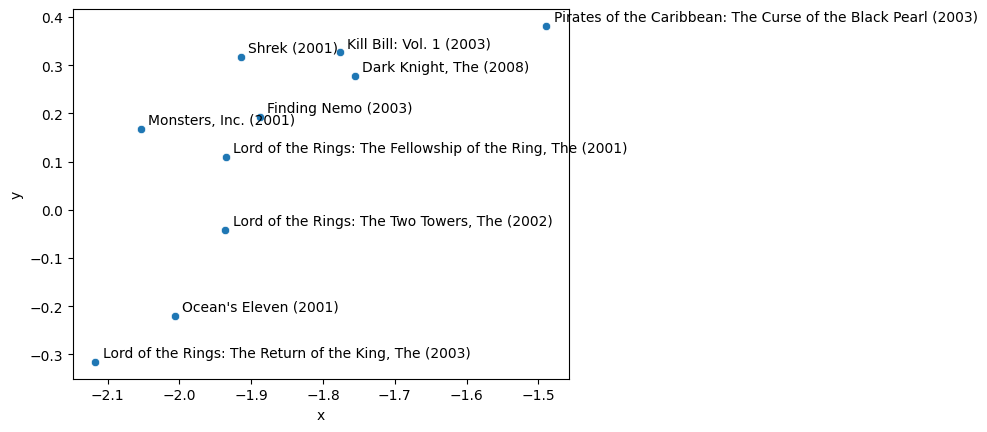

In [141]:
plotPopularFilms(approx_V)

## 3) 10 Best Movies

<AxesSubplot: xlabel='x', ylabel='y'>

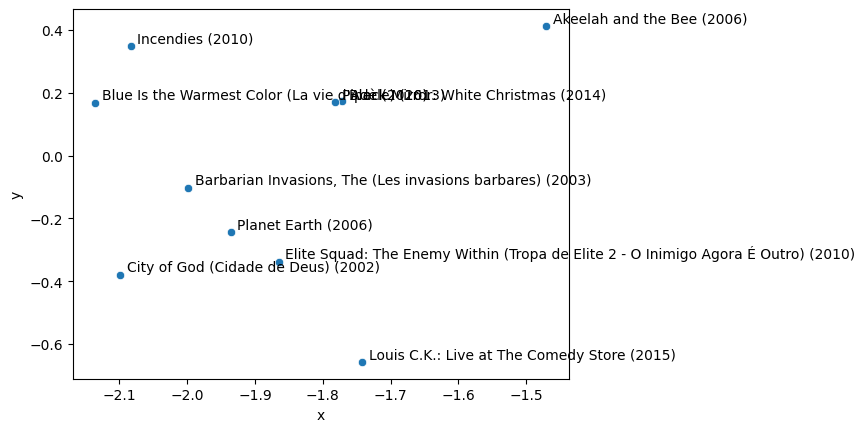

In [142]:
plotBestFilms(approx_V)

## 4) Genres
### a) Childrens

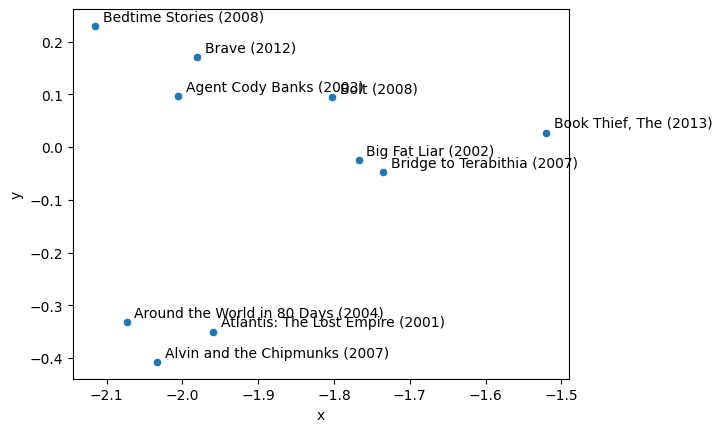

In [143]:
plotGenre(approx_V, genres[0])

### b) Horror

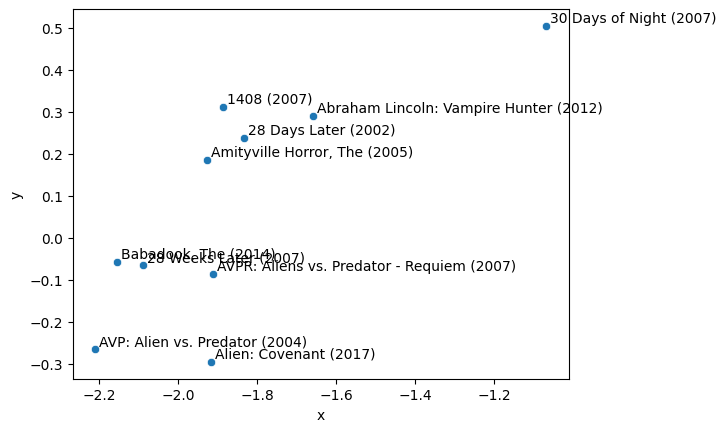

In [144]:
plotGenre(approx_V, genres[1])

### c) Sci-Fi

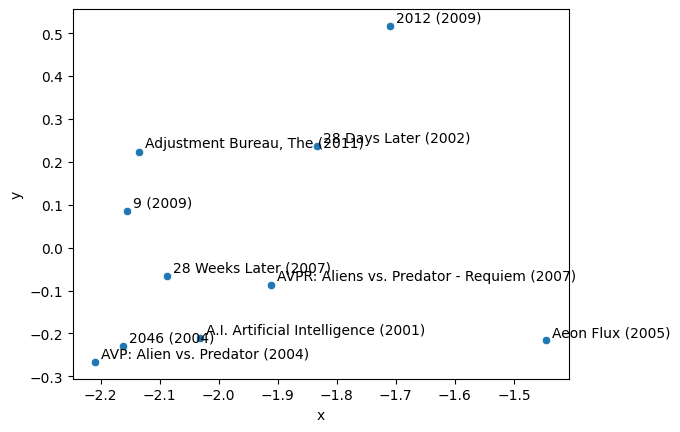

In [145]:
plotGenre(approx_V, genres[2])